**Introduction -**

> Hello, This is my first R-notebook on Kaggle. In this R-notebook, I am going to show you how Simple Linear Regression, which is a very basic of Linear Regression algorithm frequently used in Machine Learning, is applied in solving real life problems. For this purpose, I'll use a dataset in which **I have to predict Salary of an individual(say,a person) on the basis of one explanatory variable Years of Experience**. 


**Loading Dataset -**

> Link to download the dataset for offline use - https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset/download
                                             
> Now, Load the dataset in your online session as follows - 
1. Go to **Data** panel in the right of the notebook and click on **Add Data** button. A new window will open and click on **Search by URL** button.
2. Copy and paste the above mentioned URL in the search box and press **Enter**. 
3. Finally, click the button **Add Data** and data will be loaded in the current session.

> Run the following command -

In [1]:
data = read.csv("../input/years-of-experience-and-salary-dataset/Salary_Data.csv" , header = T)

> Now, Data will be succesfully Loaded in the current Session and stored in object "data".

**Loading Required Libraries -**

In [2]:
library(tidyverse)
library(caret)
library(MASS)
library(lmtest)
library(olsrr)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.1          ✔ dplyr   1.0.0     
✔ tidyr   1.1.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘olsrr’


The following object is masked from ‘package:MASS’:

    cement


The following object is masked from ‘pa

**Exploring Dataset -**

In [3]:
# Random Inspection of Dataset
sample_n(data,5)

YearsExperience,Salary
<dbl>,<dbl>
5.3,83088
2.2,39891
2.0,43525
3.2,54445
8.2,113812


**In the given dataset, The Target "Salary" and Predictior "YearsExperience" both are Quantitative Variable. Hence, we may apply Regression on the given dataset.**

> Now, Question is : Which type of Regression (Linear or Non-Linear) we must apply ?

> My suggestion  : First of all try Linear Regression since it is simpler than Non-Linear. If it does not fit properly, then go for Non-Linear Regression.

> Next Question  : There are many types of Linear Regression. Which will be better for this given dataset ?

> Answer         : Since I have only one Predictor so the possibility is either fit Simple Linear Regression or Polynomial (generally, Orthogonal Polynomial to avoid 
                   multicollinearity) Regression in one variable.
                   
> Question       : Which one of the above two Linear Regression will perform better ?

> Answer         : Plot Scatter Diagram between Predictor (on X-axis) and Target (on Y-axis). This will give a best idea.

> Let's do it as follows -

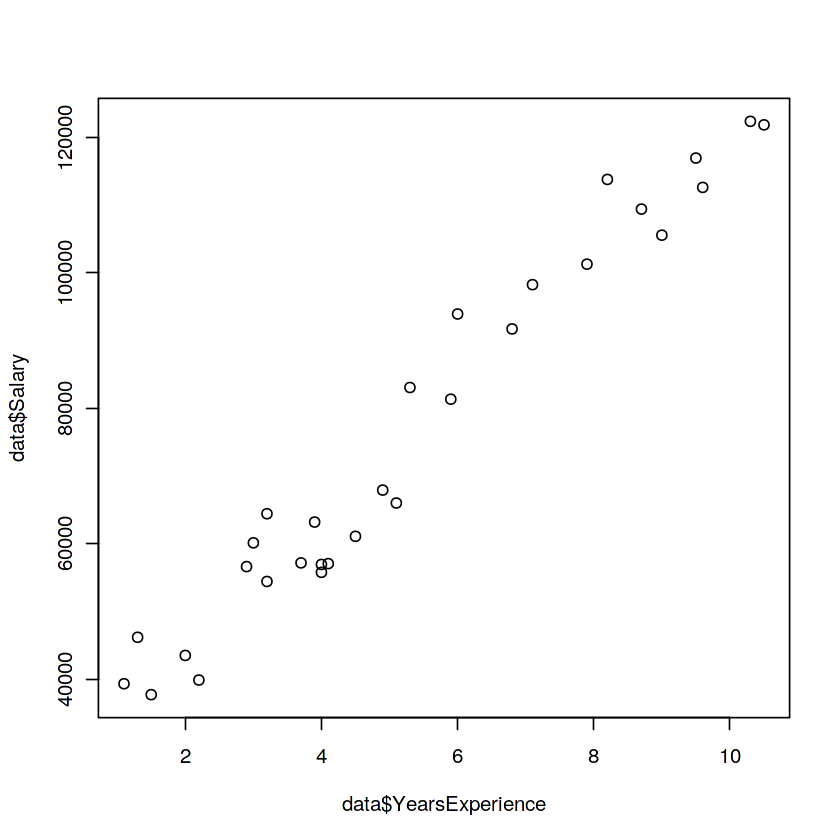

In [4]:
plot(data$YearsExperience,data$Salary)

**The above plot shows Linear relationship between Predictor and Target. So Simple Linear Regression will perform better.**

> Further, if you think that Polynomial model may perform better than Simple Linear Regression, Fit the Polynomial model, since if the polynomial model is not best for the given dataset, the higher order terms will automatically become insignificant, which in turn shows that the best model for the given data set is Simple Linear Regression. (I will see you the same in later stage.)

>  SLR is based on certain assumptions which are as follows - 
 1. Linearity        : Must be a linear relationship between Predictor and Target.
 2. Normality        : Errors must be normally distributed.
 3. Homoscadasticity : Errors must have constant variance.
 4. Auto-correlation : Errors must be uncorrelated.(Errors must be independent)
 5. Errors must have mean Zero.

The above assumptions must be satisfied, because if any of the above assumptions is not satisfied, then we can not 
sure about the validity and reliability of obtained results. In such situation, either try to satisfy assumptions or 
adopt any other method of regression to get reliable result.

Some of these assumptions are either checked before fitting the model and some are after fitting as the case will be.
This will be more clear in further steps.

**Checking Linearity assumptions by -**
1. **Visualization**     : Scatter plot between Predictor and Target helps us. (Already plotted above and found linearity.)
2. **Statistical Tests** : Pearson - Correlation test helps. Use **"cor.test()"** function. 

> Let's try it.

In [5]:
cor.test(data$YearsExperience , data$Salary)


	Pearson's product-moment correlation

data:  data$YearsExperience and data$Salary
t = 24.95, df = 28, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9542949 0.9897078
sample estimates:
      cor 
0.9782416 


> Since, **p-value is less than 0.05** and sample correlation is **0.9782416**. Hence, High significant correlation (Highly Linearly Related) exists in the population.

> Rest assumptions will be checked after fitting the model.

**Fitting Model -**

Before fitting, Split the given dataset into **train and test data**, **fit the model** and **obtain summary of model** as follows - 


In [6]:
# Randomly Split the data into training and test set

set.seed(123)
training.samples <- data$Salary %>%
  createDataPartition(p = 0.6, list = FALSE)
train.data  <- data[training.samples, ]
test.data <- data[-training.samples, ]


# Fit model

model <- lm(Salary ~ YearsExperience , data = train.data)

summary(model)


Call:
lm(formula = Salary ~ YearsExperience, data = train.data)

Residuals:
   Min     1Q Median     3Q    Max 
 -7774  -3692   -907   3990   8096 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        27474       2802   9.804 1.21e-08 ***
YearsExperience     9024        472  19.117 2.10e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5582 on 18 degrees of freedom
Multiple R-squared:  0.9531,	Adjusted R-squared:  0.9504 
F-statistic: 365.4 on 1 and 18 DF,  p-value: 2.098e-13


> The above output shows that -
1. Both the co-efficients are statistically significant since p-value < 0.05
2. The model is also statistically significant since p-value: 2.098e-13 < 0.05
3. Adjusted R-squared:  0.9504 , This shows that 95.04% of the variation available in the given dataset (in Salary) is explained by this Simple Linear Regression Model. **Rest 5% variation in Salary is due to some other predictors (as post, age of the individuals) or due to random cause**.

**Checking Rest Assumptions -**

**Normality assumption by -**
1. **Visualization**    :  Q-Q Plot of residuals helps us.
2. **Statistical Test** :  Shapiro-wilk-test on residuals helps us. Use **"shapiro.test()"** function.

> Let's try it.


	Shapiro-Wilk normality test

data:  model$residuals
W = 0.92283, p-value = 0.1123


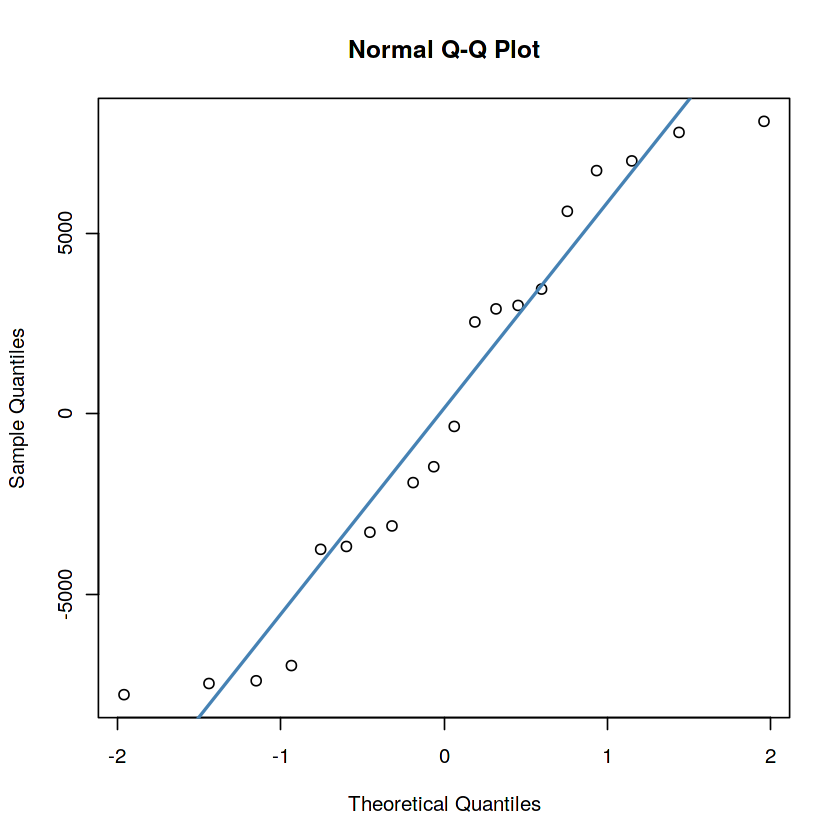

In [7]:
# Visualization
qqnorm(model$residuals)
qqline(model$residuals , col = "steelblue", lwd = 2)  

# Statistical Test
shapiro.test(model$residuals)

**Since p-value (0.1123) > 0.05 , Hence, Accept the null hypothesis, i.e., Errors are normally distributed.**

**Homoscadasticity assumption by -** 
1. **Visualization**    :  Residuals vs fitted values Plot helps us.
2. **Statistical Test** :  Breusch Pagan test helps us. Use **bptest()** function.

> Let's do it.


	studentized Breusch-Pagan test

data:  model
BP = 3.4487, df = 1, p-value = 0.0633


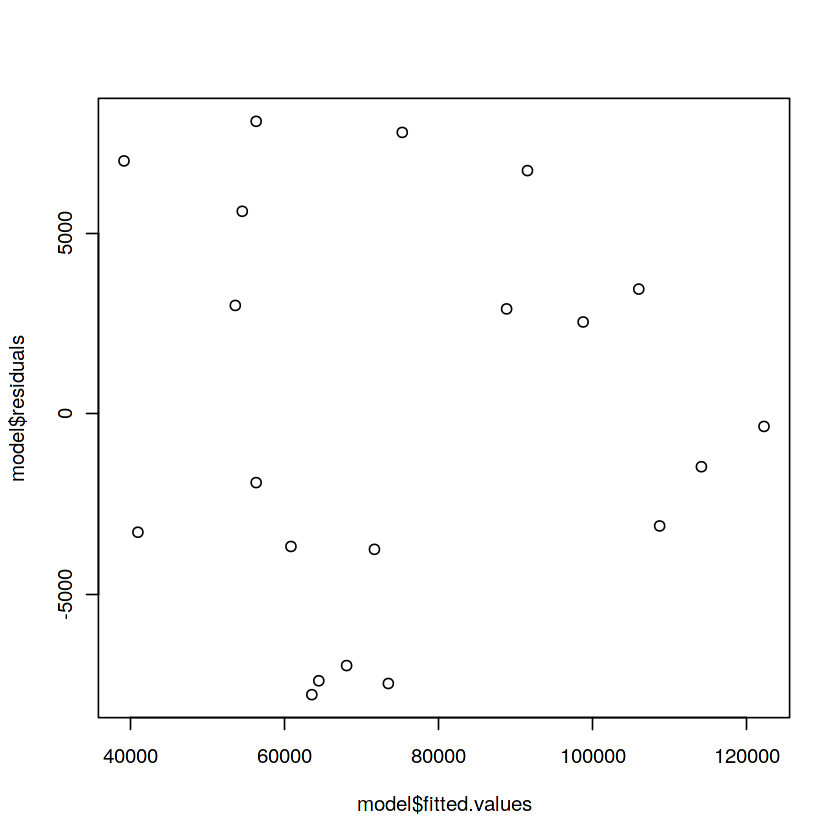

In [8]:
# Visualization
plot(model$fitted.values , model$residuals)

# Statistical Test
bptest(model)

**Since p-value (0.0633) > 0.05 , Hence, Accept null hypothesis, i.e., Errors have constant variance.**

**Auto-correlation assumption by -**
1. **Visualization**    : Residual vs Order of taking observations.
2. **Statistical Test** : Durbin-watson Test helps. Use **durbinWatsonTest()** function.

> Let's try it.


	Durbin-Watson test

data:  model
DW = 1.4699, p-value = 0.1349
alternative hypothesis: true autocorrelation is not 0


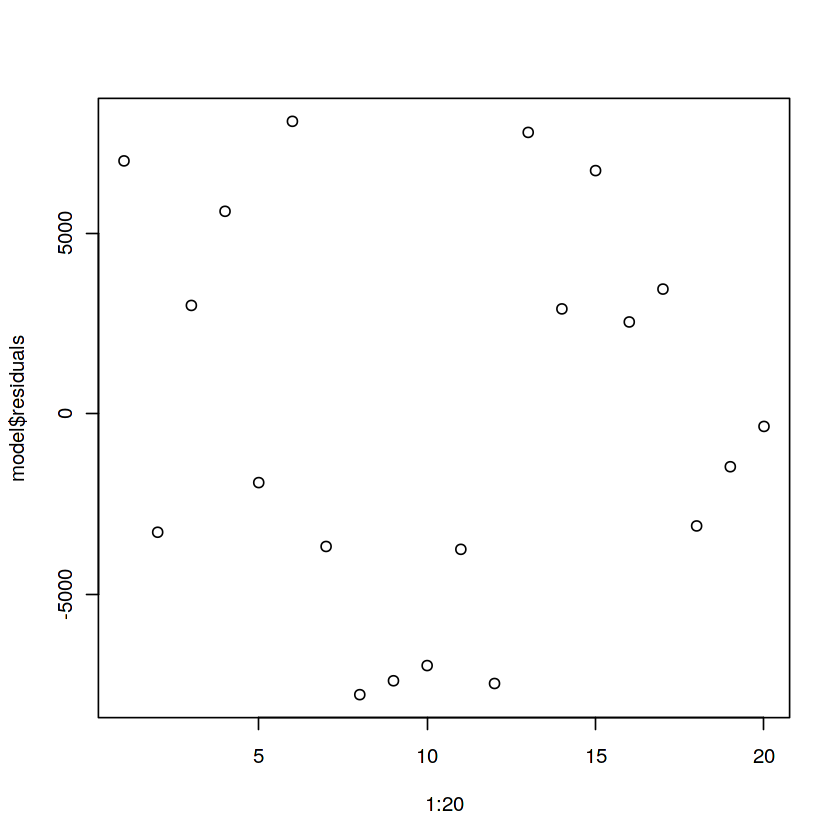

In [9]:
# Visualization
plot(1:20 , model$residuals)

# Statistical Test
dwtest(model,  alternative = c("two.sided"))

Since p-value (0.1349) > 0.05 ; Hence, Accept null hypothesis, i.e., Errors are uncorrelated.

**Assumption of Mean of errors -**

In [10]:
# Calculating mean of errors
mean(model$residuals)

[1] -5.684342e-14

**The above output shows that mean of errors is approximately zero.**

> Now, all the assumptions of Simple Linear Regression has been satisfied.

> Now, One more task is to detect whether there is any influential point in the given dataset. Because if influential point is present, then the result obtained above will become unreliable. Hence, there is a need for detection of influential point.

**Influential point detection by -**

1. **Visualization**       : Cook's distance plot helps us.
2. **Statistical Measure** : Cook's distance helps.

> Run the following command.

[1] 0.186481

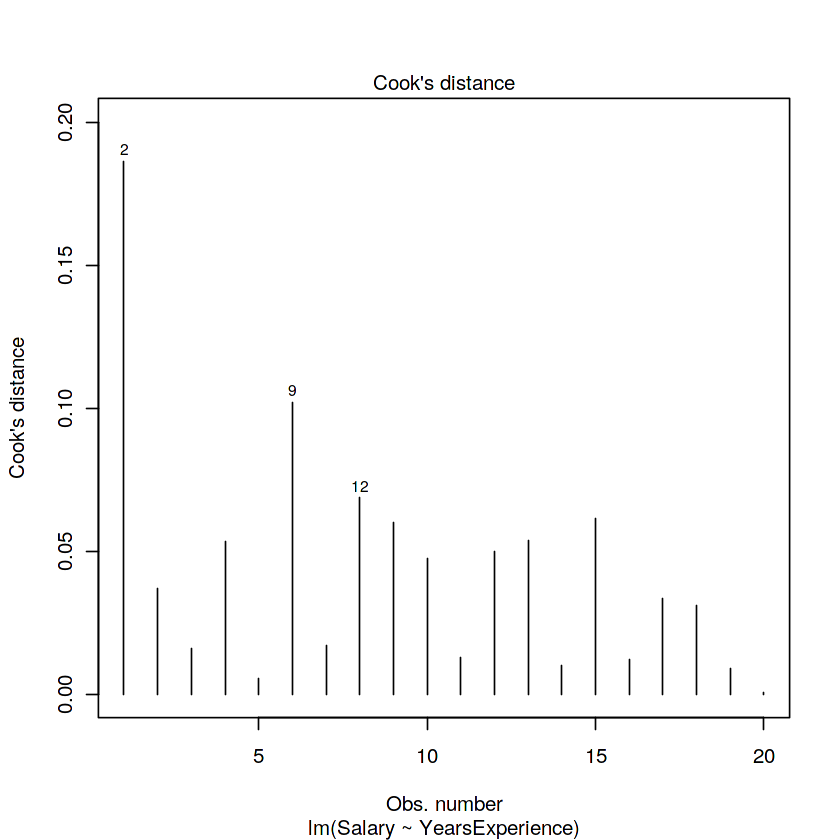

In [11]:
# Visualization (Cook's distance plot)
plot(model , 4)

# Statistical Measure
model_dm <- augment(model)

# Checking Highest Cook's distance
max(model_dm$.cooksd)

**Maximum cook's distance is 0.186480962574431**

**Since, for any observation in train data set, cook's distance is not greater than 0.5, Hence, there is no influential point in the given dataset.**

**Making Predictions -**

> Now, Simple Linear Regression model is ready. Apply it on test data set to check its performance on unseen dataset, i.e., Determine how well this model will perform on unseen data.

> This will again be done by two methods - 
1. **Visualization**       : predicted salary vs actual salary plot for test data set helps.
2. **Statistical Measure** : R2 , RMSE , MAE helps.

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.9701604,6556.616,4960.324


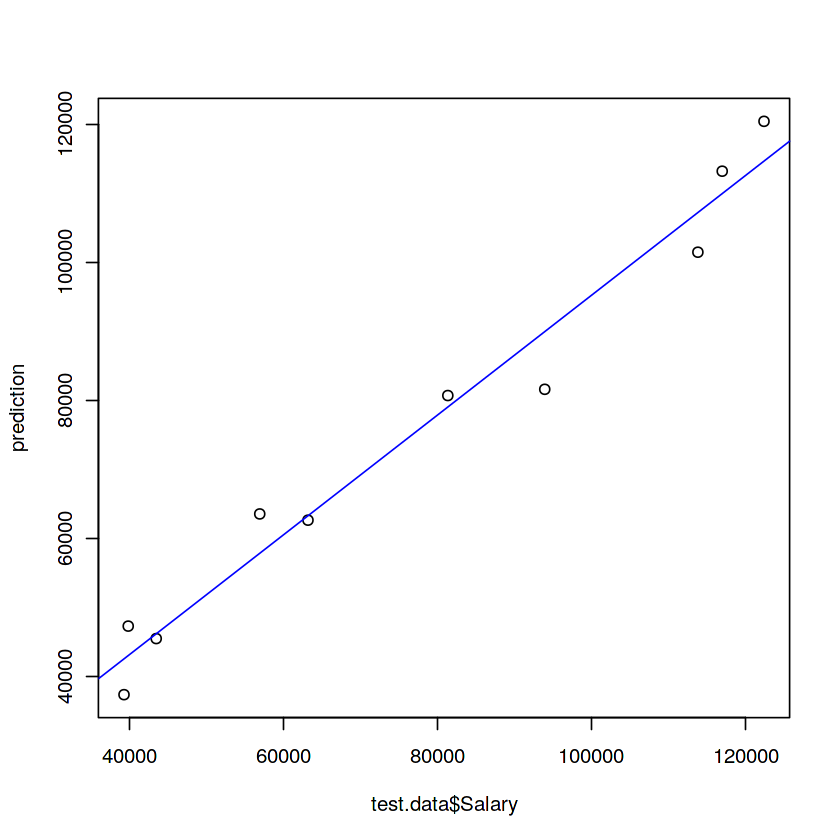

In [12]:
# Making prediction
prediction <- model %>% predict(test.data)

# Visualization
plot(test.data$Salary , prediction)
abline(lm(prediction ~ Salary, data = test.data), col = "blue")

# Statistical Measure
data.frame( R2 = R2(prediction, test.data$Salary),
            RMSE = RMSE(prediction, test.data$Salary),
            MAE = MAE(prediction, test.data$Salary))

**We obtain : R2 = 0.9701604 , which indicates a best fit.**

> Since, this result is based on only one test dataset. Hence, we can not sure that the model will perform better on all unseen data. To be more confident in this respect, we will use the method of K-fold cross validation to test the performance of model on different test data set.

> This will be done as follows -

In [13]:
# Define training control
set.seed(123)
train.control <- trainControl(method = "repeatedcv", 
                              number = 4, repeats = 3)
# Train the model
model_cv <- train(Salary ~ YearsExperience , data = data, method="lm",
                  trControl = train.control)

# Summarize the results
print(model_cv)

Linear Regression 

30 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (4 fold, repeated 3 times) 
Summary of sample sizes: 22, 23, 23, 22, 23, 23, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6197.671  0.9728739  5243.592

Tuning parameter 'intercept' was held constant at a value of TRUE


# **Great Result !**

**On an average, This Simple Linear Regression Model captures 97.29 % variability available in the target (Salary). That is, 97.29 % variability in Salary is due to the predictor "YearsExperience". Rest variability is due to some other causes (like post/age of the individuals,etc.) or due to random causes.**

> Now, prepare a polynomial model as i have said earlier as follows-

In [14]:
# Fitting Orthogonal polynomial model

model_poly <- lm(Salary ~ poly(YearsExperience,2) , data = train.data )

# Summarizing model
summary(model_poly)         


Call:
lm(formula = Salary ~ poly(YearsExperience, 2), data = train.data)

Residuals:
   Min     1Q Median     3Q    Max 
 -7308  -3738  -1985   4105   8651 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  75434       1269   59.43  < 2e-16 ***
poly(YearsExperience, 2)1   106717       5676   18.80  8.2e-13 ***
poly(YearsExperience, 2)2     3632       5676    0.64    0.531    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5676 on 17 degrees of freedom
Multiple R-squared:  0.9542,	Adjusted R-squared:  0.9488 
F-statistic: 176.9 on 2 and 17 DF,  p-value: 4.173e-12


**The above output shows that the second order of predictor is not statistically significant since p-value (0.531) > 0.05 ; Hence, Don't fit polynomial model.**

# Thanks for reading my notebook.